In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from mingus.containers import NoteContainer, Note, Bar
import mingus.core.notes as notes
import mingus.core.keys as keys
from mingus.midi import fluidsynth
from mingus.containers import Composition
from mingus.containers import Track
from mingus.containers.instrument import MidiInstrument
import time
fluidsynth.init("/Users/caf/Developer/sonify/env/GeneralUser GS 1.471/soundfont.sf2",'coreaudio')#,'Core Audio')
#can change volume for whole thing like: fluidsynth.main_volume(1,100) ie. set channel 1 to volume 100
fluidsynth.polyphony = 10 ###idk what this is
#https://stackoverflow.com/questions/41088437/write-midi-file-using-mingus-in-python-with-two-simultaneous-instruments

# note - you have to put channel in BOTH PlayNote/play_notecontainer/etc, set_instrument! defaults in many of these things overwrite parameter values from previous step

In [16]:
cc = 2
time.sleep(1)
fluidsynth.set_instrument(cc, 11) #3, 4, 6 are fine
fluidsynth.play_Note(Note("A",channel=cc))
time.sleep(1)
fluidsynth.stop_Note(Note("A",channel=cc))

fluidsynth.set_instrument(cc,99) #3, 4, 6 are fine
fluidsynth.play_Note(Note("A",channel=cc))
time.sleep(1)
fluidsynth.stop_Note(Note("A",channel=cc))

True

In [17]:
s_bar = np.load('bar_sincoeffs.npy')
c_bar = np.load('bar_coscoeffs.npy')
s_spiral = np.load('spiral_sincoeffs.npy')
c_spiral = np.load('spiral_coscoeffs.npy')
mmax = s_bar.shape[0]
nmax = s_bar.shape[1]
min_max_bar_c = (c_bar.copy()).flatten()
min_max_spiral_c = (c_spiral.copy()).flatten()
min_max_bar_s = (s_bar.copy()).flatten()
min_max_spiral_s = (s_spiral.copy()).flatten()


def find_vmin_vmax(min, max):
    if abs(min) < abs(max):
        min = -abs(max)
    elif abs(min)>abs(max):
        max = abs(min)
    return min, max
    
mmax, nmax

(8, 12)

# need to keep sin, cos separate

Text(0, 0.5, 'n')

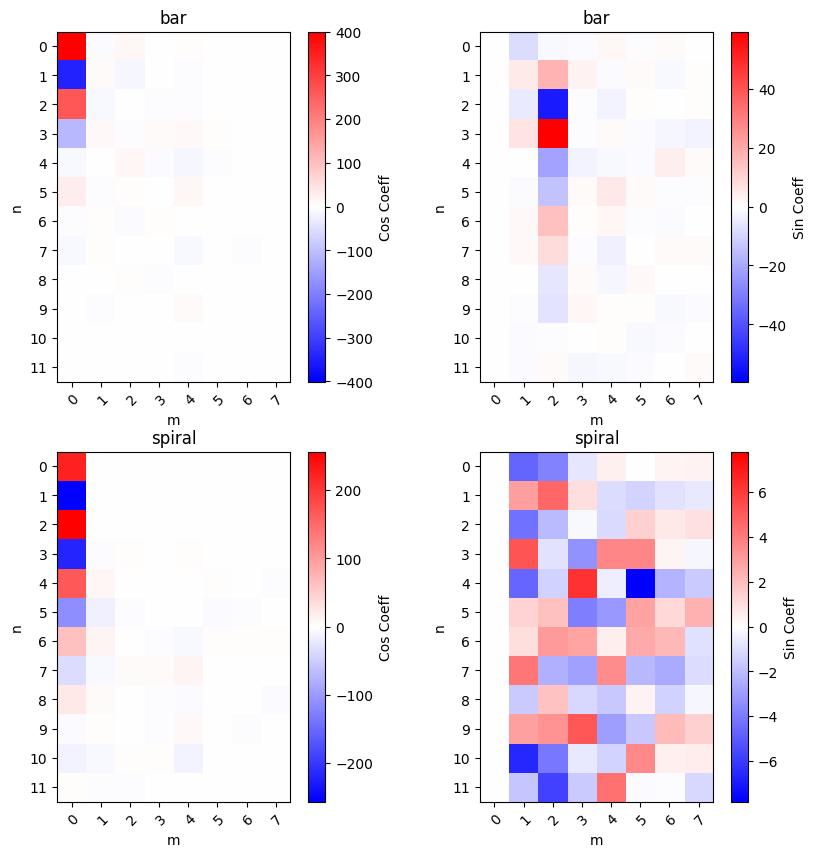

In [18]:
min_b_s, max_b_s = np.min(min_max_bar_s), np.max(min_max_bar_s)
min_b_c, max_b_c = np.min(min_max_bar_c), np.max(min_max_bar_c)

vmin_bar_c, vmax_bar_c = find_vmin_vmax(min_b_c, max_b_c)
vmin_bar_s, vmax_bar_s = find_vmin_vmax(min_b_s, max_b_s)

fig, (ax1, ax2) = plt.subplots(2,2,figsize=(10,10))

ax1[0].set_title('bar')
im = ax1[0].imshow(c_bar.T,cmap='bwr',vmin=vmin_bar_c, vmax=vmax_bar_c)
fig.colorbar(im, ax=ax1[0], label='Cos Coeff')
# Show all ticks and label them with the respective list entries
ax1[0].set_xticks(np.arange(mmax), labels=np.arange(mmax))
ax1[0].set_yticks(np.arange(nmax), labels=np.arange(nmax))

# Rotate the tick labels and set their alignment.
plt.setp(ax1[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax1[0].set_xlabel('m')
ax1[0].set_ylabel('n')

ax1[1].set_title('bar')
im = ax1[1].imshow(s_bar.T,cmap='bwr',vmin=vmin_bar_s, vmax=vmax_bar_s)
fig.colorbar(im, ax=ax1[1], label='Sin Coeff')
# Show all ticks and label them with the respective list entries
ax1[1].set_xticks(np.arange(mmax), labels=np.arange(mmax))
ax1[1].set_yticks(np.arange(nmax), labels=np.arange(nmax))

# Rotate the tick labels and set their alignment.
plt.setp(ax1[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax1[1].set_xlabel('m')
ax1[1].set_ylabel('n')


min_s_s, max_s_s = np.min(min_max_spiral_s), np.max(min_max_spiral_s)
min_s_c, max_s_c = np.min(min_max_spiral_c), np.max(min_max_spiral_c)

vmin_spiral_c, vmax_spiral_c = find_vmin_vmax(min_s_c, max_s_c)
vmin_spiral_s, vmax_spiral_s = find_vmin_vmax(min_s_s, max_s_s)

ax2[0].set_title('spiral')
im = ax2[0].imshow(c_spiral.T,cmap='bwr',vmin=vmin_spiral_c, vmax=vmax_spiral_c)
fig.colorbar(im, ax=ax2[0], label='Cos Coeff')
# Show all ticks and label them with the respective list entries
ax2[0].set_xticks(np.arange(mmax), labels=np.arange(mmax))
ax2[0].set_yticks(np.arange(nmax), labels=np.arange(nmax))

# Rotate the tick labels and set their alignment.
plt.setp(ax2[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax2[0].set_xlabel('m')
ax2[0].set_ylabel('n')

ax2[1].set_title('spiral')
im = ax2[1].imshow(s_spiral.T,cmap='bwr',vmin=vmin_spiral_s, vmax=vmax_spiral_s)
fig.colorbar(im, ax=ax2[1], label='Sin Coeff')
# Show all ticks and label them with the respective list entries
ax2[1].set_xticks(np.arange(mmax), labels=np.arange(mmax))
ax2[1].set_yticks(np.arange(nmax), labels=np.arange(nmax))

# Rotate the tick labels and set their alignment.
plt.setp(ax2[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax2[1].set_xlabel('m')
ax2[1].set_ylabel('n')

Text(0, 0.5, 'notes - ns')

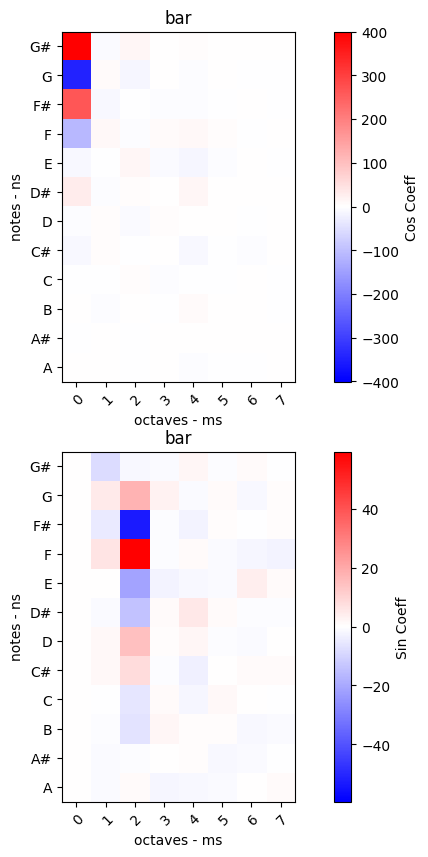

In [19]:
#ok - trying 21 notes (sharps + flats + normal) and 8 timbres, coefficients for volume
#this feels like way too many things at once
#-------------------------------------------
#have 12 notes, notes can be the n's
#can have 8 octaves for the 8 m's...?
#sin and cos can be different instruments?
8*12
#what if we just play the first X highest amplitude? then map m,ns to pitch or something
note_list = np.sort(np.array(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']))[::-1]

fig, (ax1) = plt.subplots(2,1,figsize=(10,10))

ax1[0].set_title('bar')
im = ax1[0].imshow(c_bar.T,cmap='bwr',vmin=vmin_bar_c, vmax=vmax_bar_c)
fig.colorbar(im, ax=ax1[0], label='Cos Coeff')
# Show all ticks and label them with the respective list entries
ax1[0].set_xticks(np.arange(mmax), labels=np.arange(mmax))
ax1[0].set_yticks(np.arange(nmax), labels=note_list)

# Rotate the tick labels and set their alignment.
plt.setp(ax1[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax1[0].set_xlabel('octaves - ms')
ax1[0].set_ylabel('notes - ns')

ax1[1].set_title('bar')
im = ax1[1].imshow(s_bar.T,cmap='bwr',vmin=vmin_bar_s, vmax=vmax_bar_s)
fig.colorbar(im, ax=ax1[1], label='Sin Coeff')
# Show all ticks and label them with the respective list entries
ax1[1].set_xticks(np.arange(mmax), labels=np.arange(mmax))
ax1[1].set_yticks(np.arange(nmax), labels=note_list)
# Rotate the tick labels and set their alignment.
plt.setp(ax1[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax1[1].set_xlabel('octaves - ms')
ax1[1].set_ylabel('notes - ns')

# attempt at getting negative notes to map to different instruments - 

In [51]:
# ok what if we just try the octaves instead of instruments?
note_list = np.sort(np.array(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']))[::-1] #lowest freq to highest
#['A', 'B', 'C', 'D', 'E', 'F', 'G', 'A#', 'B#', 'C#', 'D#', 'F#',  'Ab', 'Cb', 'Fb']

min_max_bar_c = (c_bar.copy()).flatten()
min_max_bar_s = (s_bar.copy()).flatten()

abs_max = np.max(np.array([np.max(abs(min_max_bar_c)),np.max(abs(min_max_bar_s))]))

c_bar_copy = c_bar.copy()
s_bar_copy = s_bar.copy()
note_cos = NoteContainer()
note_sin = NoteContainer()
note_tote = NoteContainer()
for m in range(mmax):
    octave = m
    for n in range(nmax):
        amp_c = c_bar_copy[m,n]
        amp_s = s_bar_copy[m,n]
        if abs(amp_c) >= .025*abs_max: #was .025, p good
            if amp_c > 0:
                #scale volume next - 
                noteys = Note(note_list[n],octave=octave,channel=1)
                note_cos.add_notes(noteys)
                note_tote.add_notes(noteys)
            else:
                noteys = Note(note_list[n],octave=octave,channel=2)
                note_cos.add_notes(noteys)
                note_tote.add_notes(noteys)
            print(m,n, noteys, note_cos)
        
        if abs(amp_s) >= .025*abs_max: #was .025, p good
            if amp_s > 0:
                #scale volume next - 
                noteys = Note(note_list[n],octave=octave,channel=1)
                note_sin.add_notes(noteys)
                note_tote.add_notes(noteys)
            else:
                noteys = Note(note_list[n],octave=octave,channel=2)
                note_sin.add_notes(noteys)
                note_tote.add_notes(noteys)
            print(m,n, noteys, note_cos)

0 0 'G#-0' ['G#-0']
0 1 'G-0' ['G-0', 'G#-0']
0 2 'F#-0' ['F#-0', 'G-0', 'G#-0']
0 3 'F-0' ['F-0', 'F#-0', 'G-0', 'G#-0']
0 4 'E-0' ['E-0', 'F-0', 'F#-0', 'G-0', 'G#-0']
0 5 'D#-0' ['D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0']
0 7 'C#-0' ['C#-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0']
1 2 'F#-1' ['C#-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'F#-1']
1 3 'F-1' ['C#-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'F-1', 'F#-1']
2 0 'G#-2' ['C#-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'F-1', 'F#-1', 'G#-2']
2 1 'G-2' ['C#-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'F-1', 'F#-1', 'G-2', 'G#-2']
2 1 'G-2' ['C#-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'F-1', 'F#-1', 'G-2', 'G#-2']
2 2 'F#-2' ['C#-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'F-1', 'F#-1', 'G-2', 'G#-2']
2 3 'F-2' ['C#-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'F-1', 'F#-1', 'G-2', 'G#-2']
2 4 'E-2' ['C#-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'F-1', 'F#-1', 'E-2', 'G-2'

In [52]:
# ok what if we just try the octaves instead of instruments?
note_list = np.sort(np.array(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']))[::-1] #lowest freq to highest
#['A', 'B', 'C', 'D', 'E', 'F', 'G', 'A#', 'B#', 'C#', 'D#', 'F#',  'Ab', 'Cb', 'Fb']

min_max_spiral_c = (c_spiral.copy()).flatten()
min_max_spiral_s = (s_spiral.copy()).flatten()

abs_max = np.max(np.array([np.max(abs(min_max_spiral_c)),np.max(abs(min_max_spiral_s))]))

c_spiral_copy = c_spiral.copy()
s_spiral_copy = s_spiral.copy()
note_cos_spiral = NoteContainer()
note_sin_spiral = NoteContainer()
note_tote_spiral = NoteContainer()
for m in range(mmax):
    octave = m
    for n in range(nmax):
        amp_c = c_spiral_copy[m,n]
        amp_s = s_spiral_copy[m,n]
        if abs(amp_c) >= .025*abs_max: #was .025, p good
            if amp_c > 0:
                #scale volume next - 
                noteys = Note(note_list[n],octave=octave,channel=1)
                note_cos_spiral.add_notes(noteys)
                note_tote_spiral.add_notes(noteys)
            else:
                noteys = Note(note_list[n],octave=octave,channel=2)
                note_cos_spiral.add_notes(noteys)
                note_tote_spiral.add_notes(noteys)
            print(m,n, noteys, note_cos_spiral)
        
        if abs(amp_s) >= .025*abs_max: #was .025, p good
            if amp_s > 0:
                #scale volume next - 
                noteys = Note(note_list[n],octave=octave,channel=1)
                note_sin_spiral.add_notes(noteys)
                note_tote_spiral.add_notes(noteys)
            else:
                noteys = Note(note_list[n],octave=octave,channel=2)
                note_sin_spiral.add_notes(noteys)
                note_tote_spiral.add_notes(noteys)
            print(m,n, noteys, note_cos_spiral)

0 0 'G#-0' ['G#-0']
0 1 'G-0' ['G-0', 'G#-0']
0 2 'F#-0' ['F#-0', 'G-0', 'G#-0']
0 3 'F-0' ['F-0', 'F#-0', 'G-0', 'G#-0']
0 4 'E-0' ['E-0', 'F-0', 'F#-0', 'G-0', 'G#-0']
0 5 'D#-0' ['D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0']
0 6 'D-0' ['D-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0']
0 7 'C#-0' ['C#-0', 'D-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0']
0 8 'C-0' ['C-0', 'C#-0', 'D-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0']
0 10 'A#-0' ['C-0', 'C#-0', 'D-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'A#-0']
1 4 'E-1' ['C-0', 'C#-0', 'D-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'A#-0', 'E-1']
1 5 'D#-1' ['C-0', 'C#-0', 'D-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'A#-0', 'D#-1', 'E-1']
1 6 'D-1' ['C-0', 'C#-0', 'D-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'A#-0', 'D-1', 'D#-1', 'E-1']
1 7 'C#-1' ['C-0', 'C#-0', 'D-0', 'D#-0', 'E-0', 'F-0', 'F#-0', 'G-0', 'G#-0', 'A#-0', 'C#-1', 'D-1', 'D#-1', 'E-1']
1 10 'A#-1' ['C-0', 'C#-0', 'D-0', 'D#-0', 'E-0', 'F

In [97]:
fluidsynth.set_instrument(1,1) #57, 16
fluidsynth.set_instrument(2,49) 
#1 for piano + 41 for violin is ok. 74 for flute is meh. 79 for whistle is medium. 16 for dulcimer is good, 11 for music box is good
#49 for string ensemble is great
fluidsynth.play_NoteContainer(note_tote, channel=[note.channel for note in note_tote])
time.sleep(2)
fluidsynth.stop_NoteContainer(NoteContainer(note_tote))
#11, 3 together are ok

True

In [98]:
fluidsynth.set_instrument(1,1) #
fluidsynth.set_instrument(2,49) #
fluidsynth.play_NoteContainer(note_tote_spiral,channel=[note.channel for note in note_tote])
time.sleep(2)
fluidsynth.stop_NoteContainer(NoteContainer(note_tote_spiral),channel=[note.channel for note in note_tote])

True

In [99]:
midi_file_out.write_NoteContainer("sound_a.mid", note_tote_spiral,bpm=10)
midi_file_out.write_NoteContainer("sound_b.mid", note_tote,bpm=10)

True